<a href="https://colab.research.google.com/github/SunainaMandal28/Amazon-/blob/main/Day_4_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#Importing neccessary libraries
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [15]:
#create an instance of load_iris()
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [16]:
# to make data frame

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"]=iris.target_names[iris.target]
df["species"]=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [17]:
#To know the null value
df.isna().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
Species,0
species,0


In [18]:
#To find duplicate
df.drop_duplicates()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [19]:
df[df.duplicated(keep=False)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species
101,5.8,2.7,5.1,1.9,virginica,2
142,5.8,2.7,5.1,1.9,virginica,2


In [20]:
#duplicate dletion
df.drop_duplicates(inplace=True)

In [21]:
#to check the information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   Species            149 non-null    object 
 5   species            149 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 8.1+ KB


In [22]:
#we normalized petal length into a range of 0-1
scaler = MinMaxScaler()
scalled=scaler.fit_transform(df[['petal length (cm)']])
df['scalled_column']=scalled
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species,scalled_column
0,5.1,3.5,1.4,0.2,setosa,0,0.067797
1,4.9,3.0,1.4,0.2,setosa,0,0.067797
2,4.7,3.2,1.3,0.2,setosa,0,0.050847
3,4.6,3.1,1.5,0.2,setosa,0,0.084746
4,5.0,3.6,1.4,0.2,setosa,0,0.067797


In [23]:
#display the old + new_min_max
df[['petal length (cm)','scalled_column']]

,petal length (cm),scalled_column
0,1.4,0.067797
1,1.4,0.067797
2,1.3,0.050847
3,1.5,0.084746
4,1.4,0.067797
...,...,...
145,5.2,0.711864
146,5.0,0.677966
147,5.2,0.711864
148,5.4,0.745763


In [24]:
#Use custome value for min_max_scalar
scaler = MinMaxScaler(feature_range=(5,7))
scalled=scaler.fit_transform(df[['petal length (cm)']])
df['scalled_column']=scalled
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,species,scalled_column
0,5.1,3.5,1.4,0.2,setosa,0,5.135593
1,4.9,3.0,1.4,0.2,setosa,0,5.135593
2,4.7,3.2,1.3,0.2,setosa,0,5.101695
3,4.6,3.1,1.5,0.2,setosa,0,5.169492
4,5.0,3.6,1.4,0.2,setosa,0,5.135593


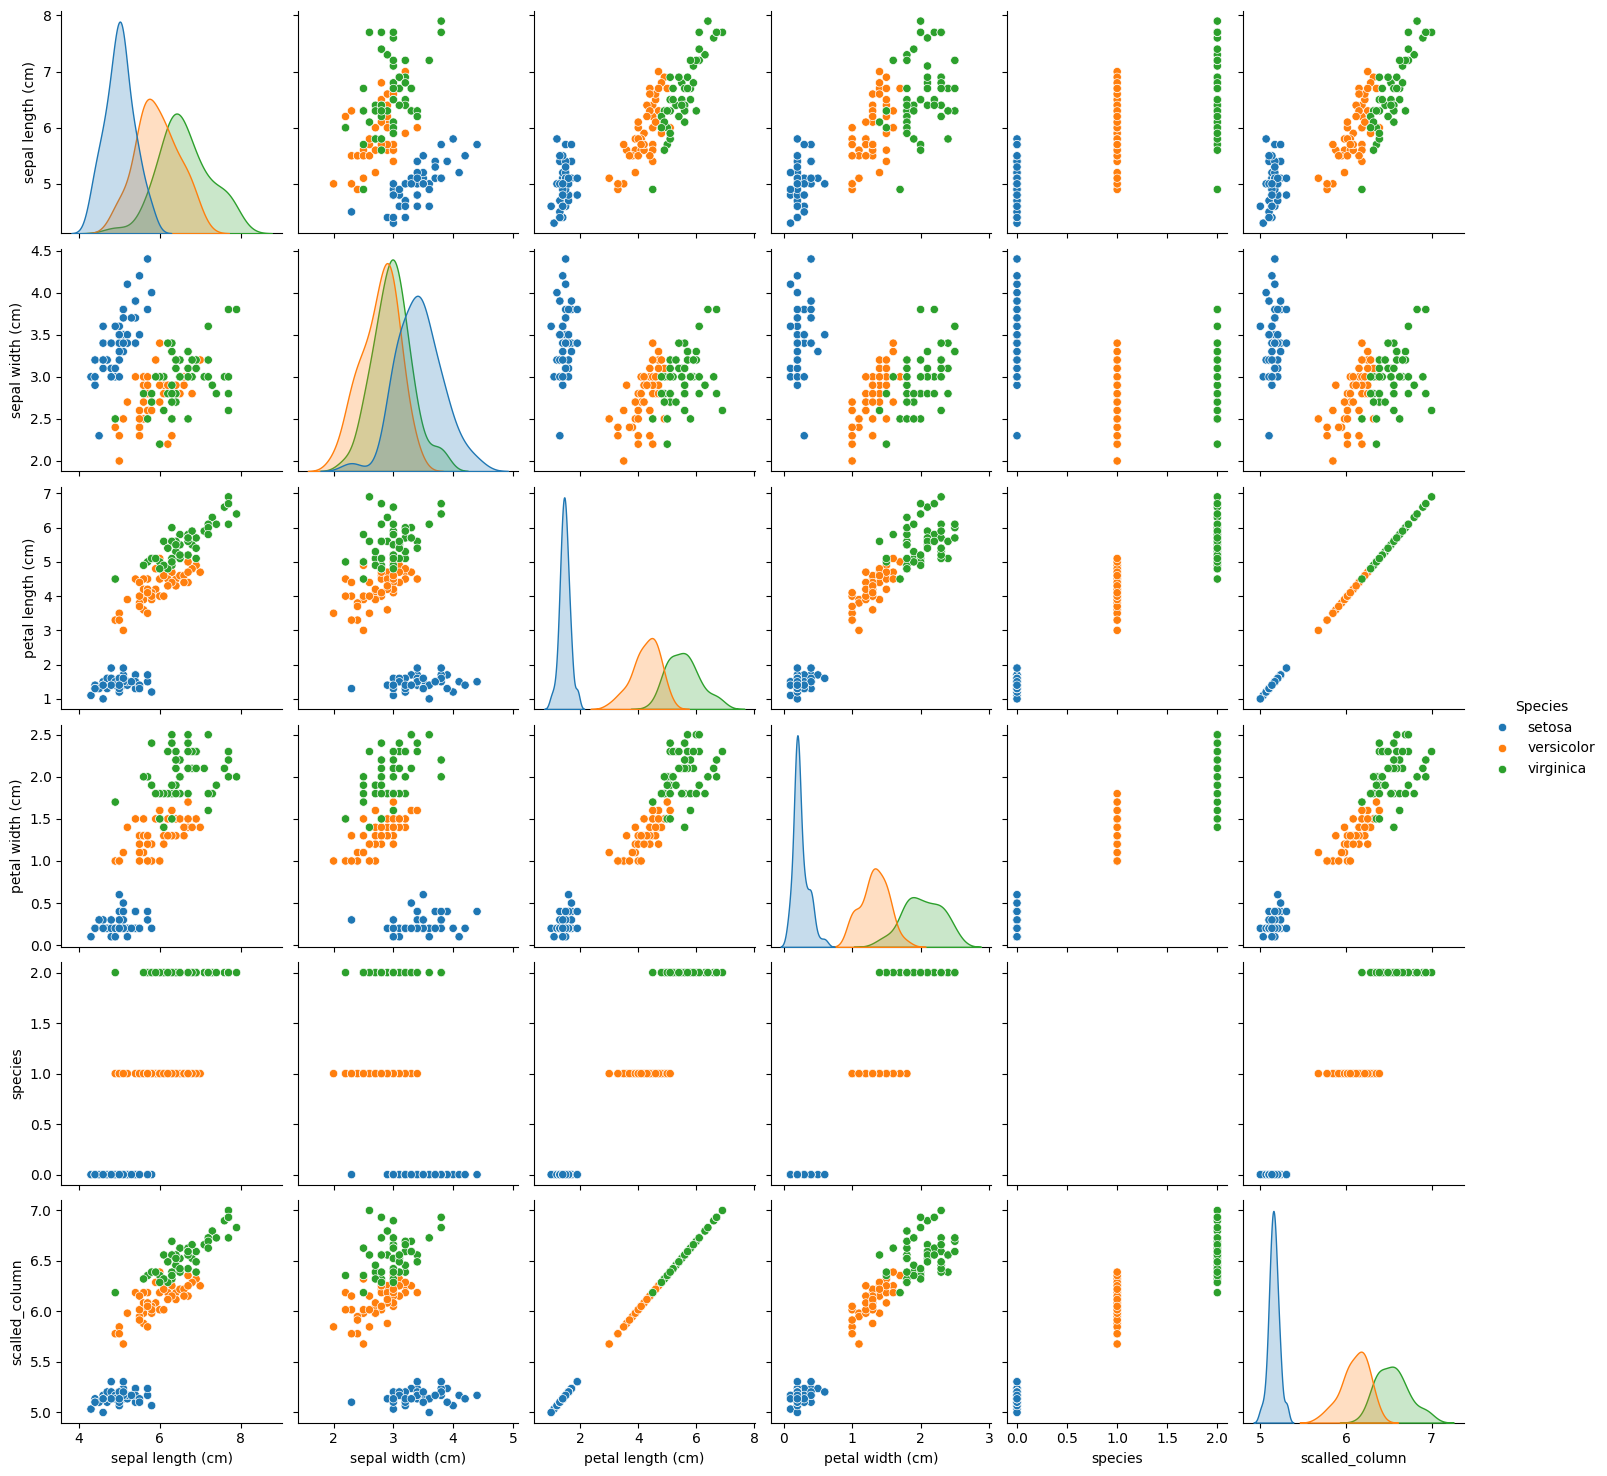

In [25]:
#pairplot
sns.pairplot(df,hue='Species')
plt.show()

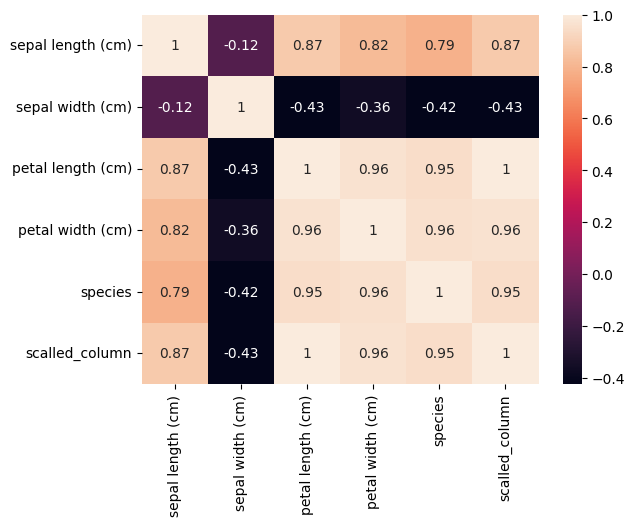

In [26]:
#compute correlation and present in heatmap
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True)
plt.show()

In [27]:
#preparing data for train-test split
# X= iris.data
# Y=iris.target
# X.shape , Y.shape

In [28]:
#dataframe use garera
X=df.drop(['Species','species'],axis=1)
y=df['species']
X.shape, y.shape

((149, 5), (149,))

In [29]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=40)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),scalled_column
62,6.0,2.2,4.0,1.0,6.016949
23,5.1,3.3,1.7,0.5,5.237288
26,5.0,3.4,1.6,0.4,5.203390
48,5.3,3.7,1.5,0.2,5.169492
2,4.7,3.2,1.3,0.2,5.101695


In [30]:
X_train.shape

(119, 5)

In [31]:
y_train.shape

(119,)

In [33]:
X_test.shape


(30, 5)

In [34]:
y_test.shape

(30,)

In [35]:
#Mathi jatti saman garim sab same hunxa for classification and clustering


In [36]:
#create a instance for DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [37]:
clf.fit(X_train, y_train)
predict = clf.predict(X_test)

In [38]:
print(f"Predict:{predict}")
print(f"Actual : {y_test}")

Predict:[0 1 2 2 1 2 1 1 1 0 1 0 0 2 1 2 2 2 1 1 2 2 1 0 1 0 0 2 0 1]
Actual : 38     0
66     1
115    2
117    2
89     1
135    2
68     1
94     1
84     1
28     0
90     1
11     0
40     0
126    2
79     1
144    2
123    2
124    2
76     1
59     1
131    2
105    2
53     1
17     0
64     1
18     0
13     0
116    2
9      0
81     1
Name: species, dtype: int64


In [39]:
#Predicting accuracy
accuracy_score(y_test, predict)

1.0

In [40]:
# compute classification_report for this model
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [41]:
#Confusion matrix and showing it in heatmap
confusion_matrix(y_test, predict)


array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

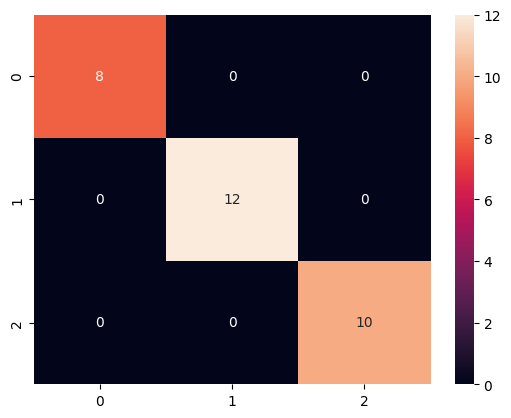

In [42]:
con=confusion_matrix(y_test, predict)
sns.heatmap(con,annot=True)
plt.show()

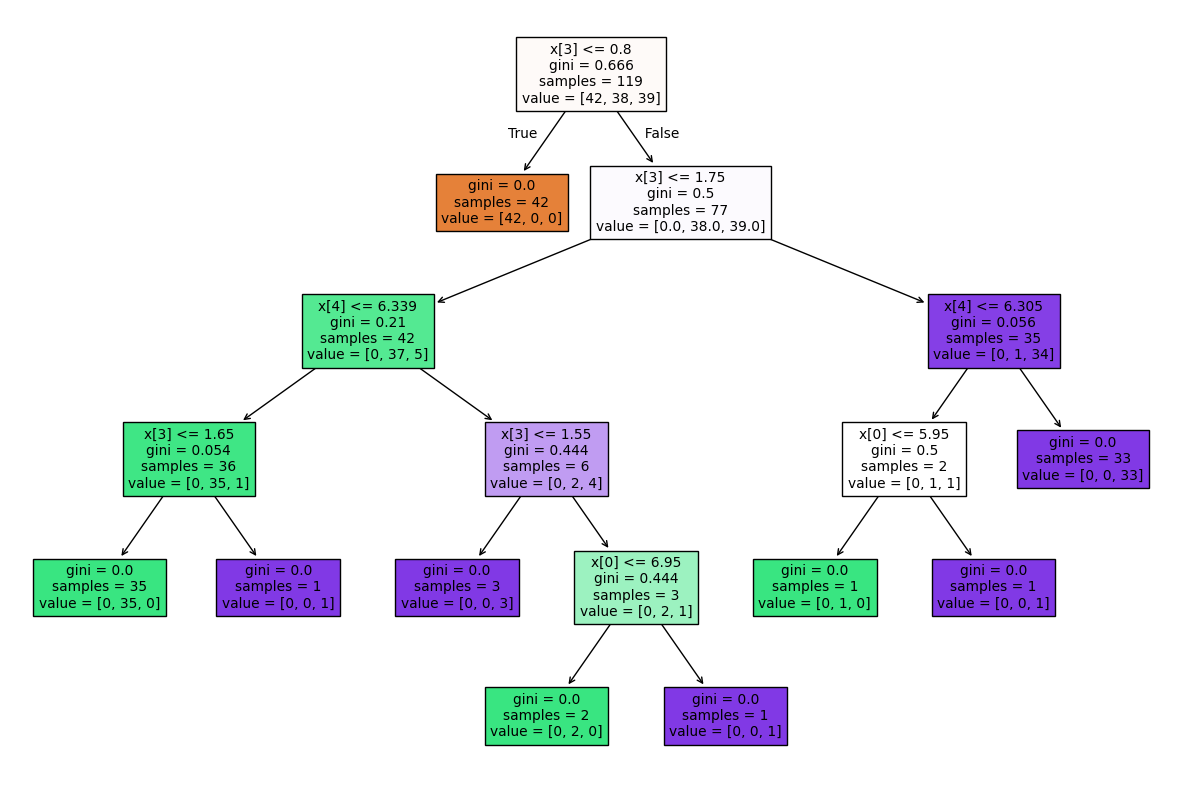

In [43]:
plt.figure(figsize=(15,10)) #to increase the size of the tree
tree.plot_tree(clf , filled =True )
plt.show()

In [44]:
#RandomForest

In [45]:
rf = RandomForestClassifier()

In [46]:
rf.fit(X_train, y_train)
predict = rf.predict(X_test)

In [47]:
#Predicting accuracy
accuracy_score(y_test, predict)

1.0

In [48]:
# compute classification_report for this model
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [49]:
confusion_matrix(y_test, predict)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

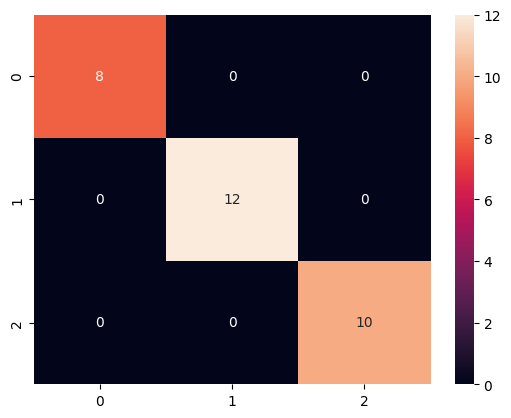

In [50]:
con=confusion_matrix(y_test, predict)
sns.heatmap(con,annot=True)
plt.show()